<a href="https://colab.research.google.com/github/rodrigomluz/codekdata/blob/main/Dados_acidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando Dados de acidentes rodoviários no Brasil.**

Aqui faremos uma análise dos dados de acidentes de trânsito no Brasil em 2020, até a data de 21 de setembro de 2020, agrupados por ocorrência e disponibilizados pela Polícia Rodoviária Federal em seu site.



Check List da análise.

* Definição do Problema
* Obtenção dos Dados
* Exploração dos Dados
* Preparação dos Dados
* Modelagem
* Avaliação



In [ ]:
#importando as biblitecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

Resolvemos definir quais colunas do arquivo original seriam de melhor relevância para análise de dados. Então resolvemos apenas usar esssas 14 colunas do documento original. Fizemos também uma pequena modificação nos nomes das colunas para que ficassem com uma melhor vizualização.


In [ ]:
#importar o arquivo csv.
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datatran2020.csv', encoding='cp1252', sep=';', 
                 usecols=[0, 4, 7, 8, 9, 10, 13, 14, 17, 18, 19, 20, 21, 27])
#definir os nomes das colunas
df.columns = ['ID', 'UF', 'Município', 
             'Causa', 'Tipo', 'Classificação', 'Condição Tempo', 'Pista', 'Vítimas', 'Mortos', 'Feridos Leves',
              'Feridos Graves', 'Ilesos', 'Regional']

#exibindo as 5 primeiras linhas do arquivo
df.head()

,ID,UF,Município,Causa,Tipo,Classificação,Condição Tempo,Pista,Vítimas,Mortos,Feridos Leves,Feridos Graves,Ilesos,Regional
0,260031.0,TO,GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Nublado,Simples,5,0,0,5,0,SR-TO
1,260036.0,RJ,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Céu Claro,Dupla,2,1,0,0,1,SR-RJ
2,260037.0,SC,SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Nublado,Simples,2,0,1,0,1,SR-SC
3,260038.0,RO,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Nublado,Simples,1,0,0,1,0,SR-RO
4,260039.0,PR,REBOUCAS,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Garoa/Chuvisco,Simples,6,0,2,4,0,SR-PR


In [ ]:
#descrever as colunas numéricas
df.describe()


,ID,Vítimas,Mortos,Feridos Leves,Feridos Graves,Ilesos
count,39709.000000,39709.000000,39709.000000,39709.000000,39709.000000,39709.000000
mean,282852.412627,2.298446,0.080360,0.854391,0.259689,0.948752
std,13030.443256,1.729549,0.327178,1.025367,0.584074,1.350419
min,260031.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,271616.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,282905.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,294184.000000,3.000000,0.000000,1.000000,0.000000,1.000000
max,309103.000000,73.000000,11.000000,42.000000,17.000000,73.000000


In [ ]:
#mostra todas as causas de acidentes possiveis listadas
df['Causa'].unique()

array(['Animais na Pista', 'Falta de Atenção do Pedestre',
       'Ingestão de Álcool', 'Velocidade Incompatível',
       'Falta de Atenção à Condução',
       'Desobediência às normas de trânsito pelo condutor',
       'Condutor Dormindo', 'Pista Escorregadia', 'Mal Súbito',
       'Avarias e/ou desgaste excessivo no pneu',
       'Não guardar distância de segurança',
       'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
       'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
       'Defeito Mecânico no Veículo', 'Ultrapassagem Indevida',
       'Defeito na Via', 'Ingestão de Substâncias Psicoativas',
       'Sinalização da via insuficiente ou inadequada',
       'Objeto estático sobre o leito carroçável', 'Agressão Externa',
       'Fenômenos da Natureza', 'Restrição de Visibilidade',
       'Desobediência às normas de trânsito pelo pedestre',
       'Carga excessiva e/ou mal acondicionada'], dtype=object)

Logo podemos perceber que o maior causador de acidentes é a 'Falta de atenção à condução' com 13811 casos em todo território brasileiro. Como estamos apenas analisando dados de alguns meses do ano de 2020 não temos um comparativo com outros anos. Portanto não dá pra saber se por motivo das políticas de não ingestão de bebidas alcoólicas, a causa 'Ingestão de Álcool' aumentou ou não por estar em 4ª nas causas de acidentes.

In [ ]:
#quantidades de acidentes por causas.
df['Causa'].value_counts()

Falta de Atenção à Condução                                                       13811
Desobediência às normas de trânsito pelo condutor                                  5392
Velocidade Incompatível                                                            3709
Ingestão de Álcool                                                                 3237
Defeito Mecânico no Veículo                                                        2384
Não guardar distância de segurança                                                 2165
Condutor Dormindo                                                                  1324
Pista Escorregadia                                                                 1303
Falta de Atenção do Pedestre                                                       1079
Animais na Pista                                                                    945
Defeito na Via                                                                      711
Ultrapassagem Indevida          

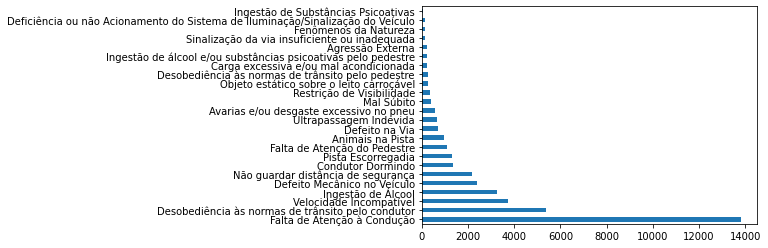

In [ ]:
#plotar em um gráfico a quantidades de acidentes por causas.
df['Causa'].value_counts().plot.barh();

In [ ]:
#quantidades de acidentes por região.
df['UF'].value_counts()

MG    5146
SC    4658
PR    4547
RS    2712
RJ    2590
SP    2490
BA    2132
GO    2022
PE    1589
ES    1559
MT    1373
RO     989
CE     944
MS     933
PB     877
RN     804
PI     715
MA     680
DF     673
PA     621
AL     401
SE     372
TO     360
AC     190
RR     160
AM      86
AP      86
Name: UF, dtype: int64

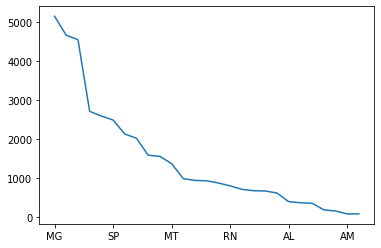

In [ ]:
#plotando o gráfico de acidentes por região

df['UF'].value_counts().plot();

In [ ]:
#tipos de cada coluna
df.dtypes

ID                float64
UF                 object
Município          object
Causa              object
Tipo               object
Classificação      object
Condição Tempo     object
Pista              object
Vítimas             int64
Mortos              int64
Feridos Leves       int64
Feridos Graves      int64
Ilesos              int64
Regional           object
dtype: object

In [ ]:
#quantidades de acidentes por municipios.
df['Município'].value_counts()



BRASILIA                   673
CURITIBA                   623
SAO JOSE                   393
GUARULHOS                  387
PALHOCA                    380
                          ... 
GUAPIRAMA                    1
BREJAO                       1
RIBEIRAO DO SUL              1
RUBELITA                     1
FORTALEZA DOS NOGUEIRAS      1
Name: Município, Length: 1692, dtype: int64

In [ ]:
print('Nesses 9 primeiros meses de 2020\n')

media = df['Município'].value_counts().median()
print('A média de acidentes por municípios foi de: {:.0f} acidentes'.format(media))

media_uf = df['UF'].value_counts().median()
print('A média de acidentes por UF foi de: {:.0f} acidentes'.format(media_uf))


Nesses 9 primeiros meses de 2020

A média de acidentes por municípios foi de: 10 acidentes
A média de acidentes por UF foi de: 933 acidentes


In [ ]:

df['Mortos'].value_counts()


0     36955
1      2444
2       228
3        56
4        18
5         5
11        1
8         1
7         1
Name: Mortos, dtype: int64

In [ ]:
df[df['Causa'].str.contains('Condutor Dormindo')].count()

ID                1324
UF                1324
Município         1324
Causa             1324
Tipo              1324
Classificação     1324
Condição Tempo    1324
Pista             1324
Vítimas           1324
Mortos            1324
Feridos Leves     1324
Feridos Graves    1324
Ilesos            1324
Regional          1324
dtype: int64

In [ ]:
#Dividir o Dtaframe original apenas pelo Condutor Dormindo
df_condutor_dormindo = df[df['Causa'] == 'Condutor Dormindo']

df_condutor_dormindo

,ID,UF,Município,Causa,Tipo,Classificação,Condição Tempo,Pista,Vítimas,Mortos,Feridos Leves,Feridos Graves,Ilesos,Regional
10,260045.0,SC,IBIRAMA,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Nublado,Simples,4,0,2,2,0,SR-SC
23,260065.0,PR,IPIRANGA,Condutor Dormindo,Colisão com objeto estático,Com Vítimas Feridas,Céu Claro,Simples,4,0,2,2,0,SR-PR
32,260075.0,MG,RIO MANSO,Condutor Dormindo,Capotamento,Sem Vítimas,Céu Claro,Dupla,1,0,0,0,1,SR-MG
39,260084.0,RJ,ANGRA DOS REIS,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Céu Claro,Simples,7,0,4,0,3,SR-RJ
40,260085.0,RS,BARRACAO,Condutor Dormindo,Saída de leito carroçável,Sem Vítimas,Céu Claro,Simples,1,0,0,0,0,SR-RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39438,304832.0,BA,SAO SEBASTIAO DO PASSE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Céu Claro,Dupla,5,0,4,0,1,SR-BA
39514,304912.0,MG,CAETE,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Céu Claro,Dupla,2,0,1,0,1,SR-MG
39600,306669.0,MT,PEDRA PRETA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Fatais,Céu Claro,Simples,1,1,0,0,0,SR-MT
39636,307148.0,MT,SINOP,Condutor Dormindo,Colisão lateral,Com Vítimas Fatais,Céu Claro,Simples,4,1,0,0,3,SR-MT


In [ ]:
#número de vitimas envolvidas por acidentes em que o condutor dormiu ao volante.

df_condutor_dormindo['Classificação'].value_counts()

Com Vítimas Feridas    1002
Sem Vítimas             206
Com Vítimas Fatais      116
Name: Classificação, dtype: int64


# Santa catarina foi a cidade com maior quantidade de causa de acidentes por Falta de atenção à condução, com um total de 1792.


In [ ]:
#Dividir o Dtaframe original apenas pela Falta de Antenção à Condução

df_falta_atencao = df[df['Causa'] == 'Falta de Atenção à Condução']

#quantidades de acidentes por falta de atenção por estados.
df_falta_atencao['UF'].value_counts()


SC    1792
PR    1709
MG    1608
RJ    1000
SP     932
RS     918
BA     687
GO     682
ES     634
MT     520
PE     505
MS     307
RO     306
CE     296
DF     262
RN     245
PB     237
PI     231
MA     199
PA     175
AL     158
TO     113
SE     109
AC      72
RR      56
AP      30
AM      28
Name: UF, dtype: int64

In [ ]:
df_falta_atencao['Classificação'].value_counts()


Com Vítimas Feridas    11051
Sem Vítimas             2101
Com Vítimas Fatais       659
Name: Classificação, dtype: int64

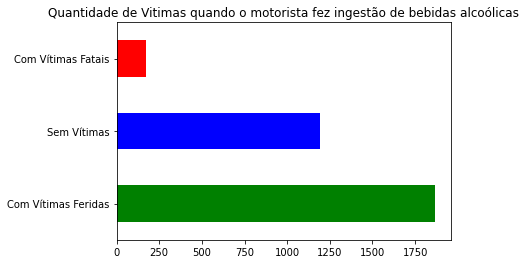

In [ ]:
df_ingestao_alcool=df[df['Causa'] == 'Ingestão de Álcool']
df_ingestao_alcool['Classificação'].value_counts().plot.barh(color=['green','blue','red'], title='Quantidade de Vitimas quando o motorista fez ingestão de bebidas alcoólicas');

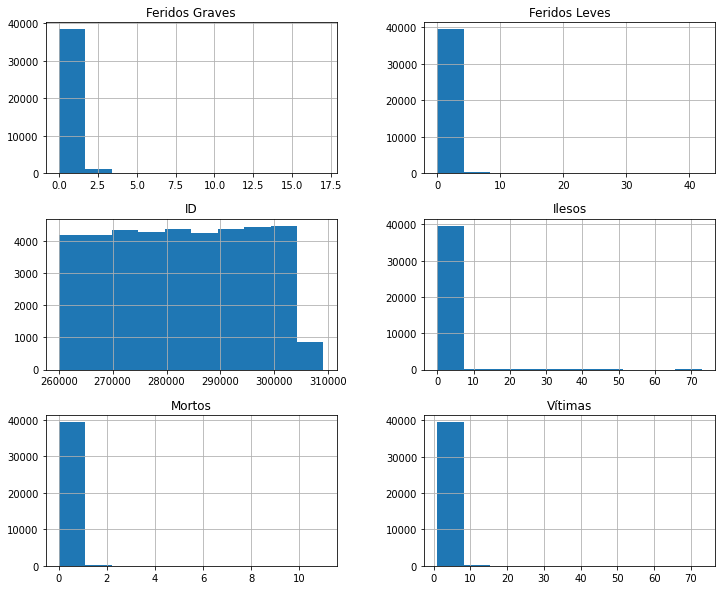

In [ ]:
df.hist(figsize=(12,10));

In [ ]:
# Analisar a probabilidade de mortes por Causa

df[['Causa', 'Mortos']].groupby(['Causa']).mean()*100


,Mortos
Causa,
Agressão Externa,4.464286
Animais na Pista,5.396825
Avarias e/ou desgaste excessivo no pneu,6.076389
Carga excessiva e/ou mal acondicionada,2.145923
Condutor Dormindo,11.933535
Defeito Mecânico no Veículo,3.271812
Defeito na Via,7.594937
Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo,20.000000
Desobediência às normas de trânsito pelo condutor,9.514095


In [ ]:
# Analisar a probabilidade de mortes por Condição do tempo

df[['Condição Tempo', 'Mortos']].groupby(['Condição Tempo']).mean()*100

,Mortos
Condição Tempo,
Chuva,9.434400
Céu Claro,8.170073
Garoa/Chuvisco,7.605422
Granizo,100.000000
Ignorado,8.668076
Nevoeiro/Neblina,14.772727
Nublado,7.165726
Sol,5.896469
Vento,14.814815


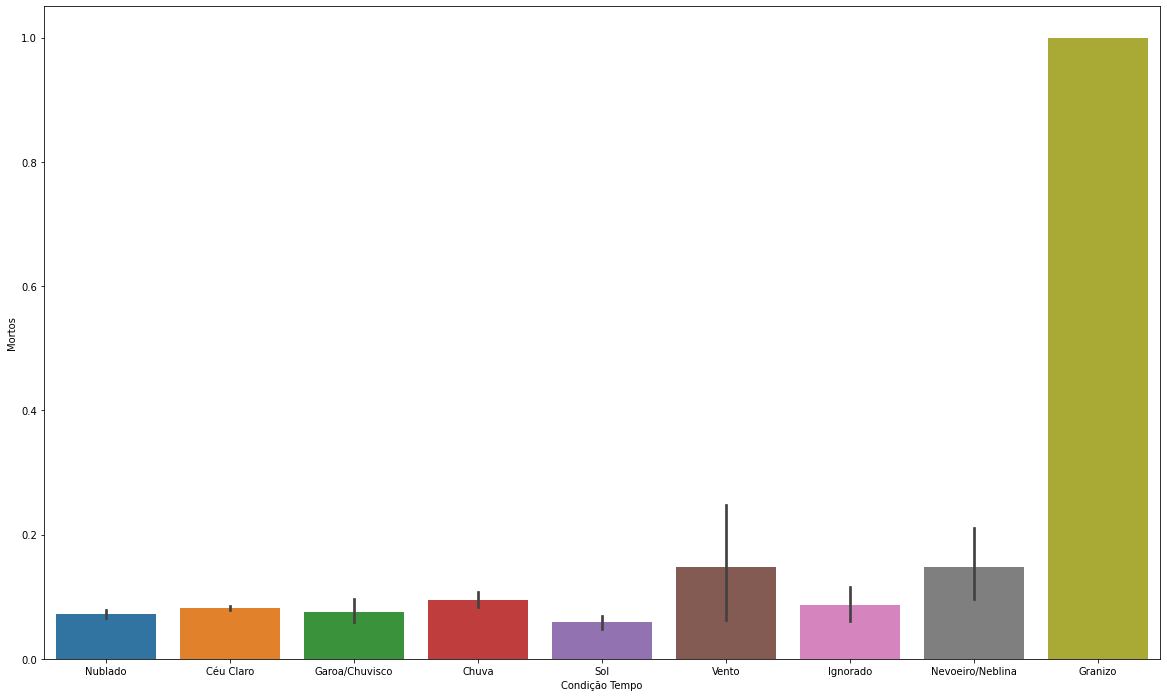

In [ ]:
#Analisar a probabilidade de mortes por Condição do tempo no grafico
fig, (axis1) = plt.subplots(figsize=(20,12))

sns.barplot(x='Condição Tempo', y='Mortos', data=df, ax=axis1);